# Perceptron learning

The perceptron function can take on many functions. In this example we will look at the step function of a linear combination of the inputs. The perceptron function is 

$\hat{y_i} = \begin{cases} -1, & \mbox{if } w^T x_i<0 \\ +1, & \mbox{if } w^T x_i > 0 \end{cases}$

where the predicted class for an instance $i$ is $\hat{y_i}$, the weight vector is $w$ and the features of the instance is $x_i$ and has dimensionality $m$.

There is no closed form solution for determining $w$ thus we use gradient descent to minimize the prediction errors.

## Optimization algorithm

Initialize the weight vector to 0.

$w = [0, 0, ..., 0_{m+1}]$.

Do until convergence:

At each iteration, take a random instance $x_i \in X$ and predict its class $\hat{y}$.

if $\hat{y} == y_i$: $w^{(k+1)} = w^{(k)} + \rho^{(k)}\hat{y_i}x_i$

else: do nothing

In [335]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [356]:
def get_weights(x, y, verbose = 0):
    shape = x.shape
    x = np.insert(x, 0, 1, axis=1)
    w = np.ones((shape[1]+1,))
    
    learning_rate = 10
    iteration = 0
    loss = None
    while iteration <= 1000 and loss != 0:
        for ix, i in enumerate(x):
            pred = np.dot(i,w)
            if pred > 0: pred = 1
            elif pred < 0: pred = -1
            if pred != y[ix]:
                w = w - learning_rate * pred * i
                
            if verbose == 1:
                print('X_i = ', i, '    y = ', y[ix])
                print('Pred: ', pred )
                print('Weights', w)
                print('------------------------------------------')
        
        
        loss = np.dot(x, w)
        loss[loss<0] = -1
        loss[loss>0] = 1
        loss = np.sum(loss - y )
        
        if verbose == 1:
            print('------------------------------------------')
            print('------------------------------------------')
            print('------------------------------------------')
            print(np.sum(loss - y ))
            print('------------------------------------------')
            print('------------------------------------------')
            print('------------------------------------------')
        if iteration%10 == 0: learning_rate = learning_rate / 2
        iteration += 1    
    print('Weights: ', w)
    print('Loss: ', loss)
    return w

Import the data from the "perceptron.csv" file and seperate into the feature set, $X$, and the labels, $Y$.

In [357]:
df = np.loadtxt("perceptron.csv", delimiter = ',')
x = df[:,0:-1]
y = df[:,-1]

print('Dataset')
print(df, '\n')

w = get_weights(x, y)
x = np.insert(x, 0, 1, axis=1)

pred = np.dot(x, w)
pred[pred > 0] =  1
pred[pred < 0] = -1
print('Predictions', pred)

Dataset
[[  3.   4.   1.]
 [  2.   3.   1.]
 [  5.   5.   1.]
 [ 10.   9.  -1.]
 [ 11.  11.  -1.]] 

Weights:  [ 26. -24.  21.]
Loss:  0.0
Predictions [ 1.  1.  1. -1. -1.]


# Plotting results

We can visualize our linear separator by putting the dataset on the plot and drawing the line defined by the weight vector $w$. 

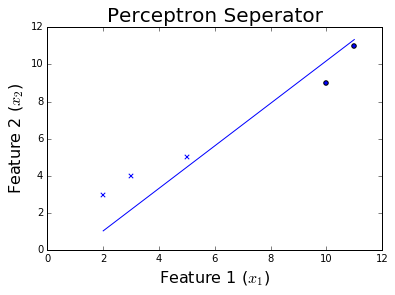

In [358]:
x1 = np.linspace(np.amin(x[:,1]),np.amax(x[:,2]),2)
x2 = np.zeros((2,))
for ix, i in enumerate(x1):
    x2[ix] = (-w[0] - w[1]*i) / w[2]

plt.scatter(x[y>0][:,1], x[y>0][:,2], marker = 'x')
plt.scatter(x[y<0][:,1], x[y<0][:,2], marker = 'o')
plt.plot(x1,x2)
plt.title('Perceptron Seperator', fontsize=20)
plt.xlabel('Feature 1 ($x_1$)', fontsize=16)
plt.ylabel('Feature 2 ($x_2$)', fontsize=16)
plt.show()